In [61]:
#importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [62]:
df = pd.read_excel('ALL PRICES - NHC PROJECTS.xlsx',sheet_name=1)

In [63]:
df.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,KONGWA,2,56.0,normal,35492580.0,41881244.4,-6.2000,36.4170
1,KONGWA,3,70.0,normal,39835800.0,47006244.0,-6.2000,36.4170
2,KONGWA,3,56.0,normal,40166280.0,47396210.4,-6.2000,36.4170
3,MKUZO,2,56.0,normal,36310680.0,42846602.4,-10.6425,35.6317
4,MKUZO,3,70.0,normal,41727960.0,49238992.8,-10.6425,35.6317


In [64]:
#reshuffling the data
df_shuf=df.sample(frac=1).reset_index(drop=True)

In [31]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Napupa - Masasi,3,85.0,normal,49895000.0,58876100.00,-10.7272,38.8006
1,MVOMERO,2,56.0,normal,34454160.0,40655908.80,-6.3029,37.4446
2,Leverosi - Arusha,2,60.0,normal,82108882.0,96888480.76,-3.4470,36.6741
3,IYUMBU - DODOMA,3,79.0,Apartment,57670000.0,68050600.00,-6.2008,35.8369
4,IYUMBU - DODOMA,3,115.0,Apartment,83950000.0,99061000.00,-6.2008,35.8369


<AxesSubplot:>

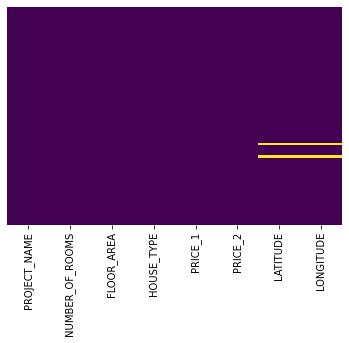

In [32]:
#visualizing the missing values present in the dataframe
sns.heatmap(df_shuf.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [65]:
#conversion of categorical data to numerical values via direct mapping

scale_mapper= {'normal':1, 'Apartment':2}
df_shuf['HOUSE_TYPE'].replace(scale_mapper, inplace=True)

In [66]:
df_shuf['HOUSE_TYPE'].value_counts()

1    60
2    25
Name: HOUSE_TYPE, dtype: int64

In [67]:
df_shuf.head()

,PROJECT_NAME,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_1,PRICE_2,LATITUDE,LONGITUDE
0,Kibada - Dar es salaam,3,144.0,1,74304416.0,8.767921e+07,-6.8640,39.3880
1,Mwongozo,3,130.0,1,116356500.0,1.373007e+08,-6.7978,39.2621
2,BOMBAMBILI,2,56.0,1,36783720.0,4.340479e+07,-10.6589,35.6460
3,Buhare - Musoma,3,85.0,1,49850000.0,5.882300e+07,-1.5000,33.8000
4,MKUZO,3,70.0,1,41727960.0,4.923899e+07,-10.6425,35.6317


In [68]:
#dropping string columns and additional price column
new_df = df_shuf.drop(columns=['PROJECT_NAME','PRICE_1'], axis=1)

In [69]:
new_df.head(2)

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3,144.0,1,8.767921e+07,-6.8640,39.3880
1,3,130.0,1,1.373007e+08,-6.7978,39.2621


In [70]:
#filling the missing numerical values using the NN imputation method
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=20)

In [71]:
imput_df = imputer.fit_transform(new_df.values)
house_df = pd.DataFrame(imput_df, columns=new_df.columns)

<AxesSubplot:>

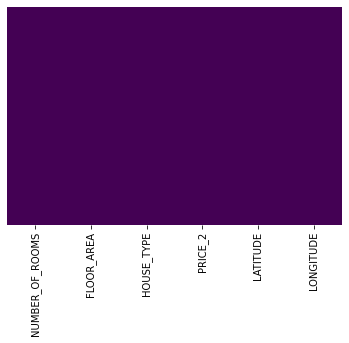

In [72]:
#visualizing the missing values present in the dataframe
sns.heatmap(house_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [73]:
#Standardizing the features using standard scaler for machine learning algorithms to understand
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
standardized_df = scaler.fit_transform(house_df)

In [74]:
#creating dataframe conducive for the ML algorithms
best_df = pd.DataFrame(standardized_df, columns=new_df.columns)

In [75]:
best_df.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,0.245722,0.760423,-0.645497,-0.440136,-0.081641,0.913118
1,0.245722,0.464303,-0.645497,-0.197162,-0.050758,0.868230
2,-1.653038,-1.100901,-0.645497,-0.656928,-1.852001,-0.421025
3,0.245722,-0.487510,-0.645497,-0.581432,2.420719,-1.079183
4,0.245722,-0.804781,-0.645497,-0.628361,-1.844350,-0.426124


In [76]:
#checking correlation of each feature in relation to the price
corr_matrix = best_df.corr()
corr_matrix['PRICE_2'].sort_values(ascending=False)

PRICE_2            1.000000
FLOOR_AREA         0.864313
HOUSE_TYPE         0.746561
NUMBER_OF_ROOMS    0.533343
LONGITUDE          0.452649
LATITUDE          -0.011895
Name: PRICE_2, dtype: float64

<AxesSubplot:xlabel='FLOOR_AREA', ylabel='PRICE_2'>

<Figure size 1080x576 with 0 Axes>

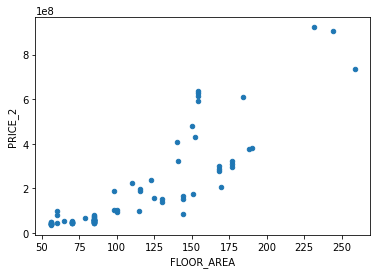

In [77]:
#plotting the most correlated feature against the price
plt.figure(figsize=(15,8))
house_df.plot(kind='scatter', x='FLOOR_AREA', y='PRICE_2', alpha=1)

/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 864x576 with 0 Axes>

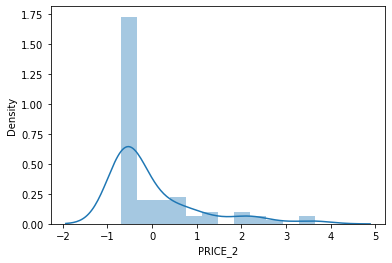

<Figure size 864x576 with 0 Axes>

In [78]:
#plotting the price distribution
sns.distplot(best_df.PRICE_2)
plt.figure(figsize=(12,8))

<AxesSubplot:>

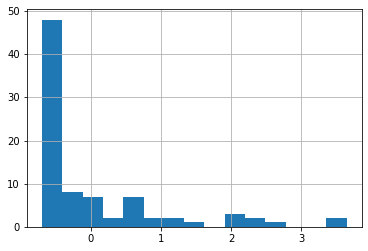

In [79]:
best_df['PRICE_2'].hist(bins=15)

<AxesSubplot:>

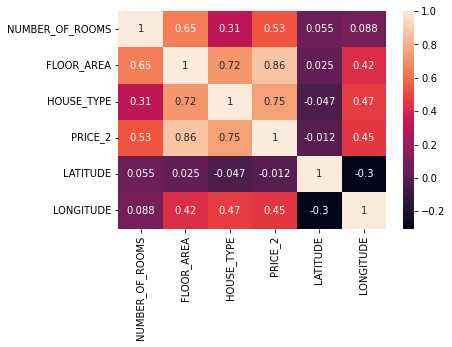

In [80]:
#heat map showing the correlation of features with respect to the price
sns.heatmap(best_df.corr(), annot=True)

In [81]:
#Assigning the features into X and Y 
X = best_df[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y = best_df['PRICE_2']

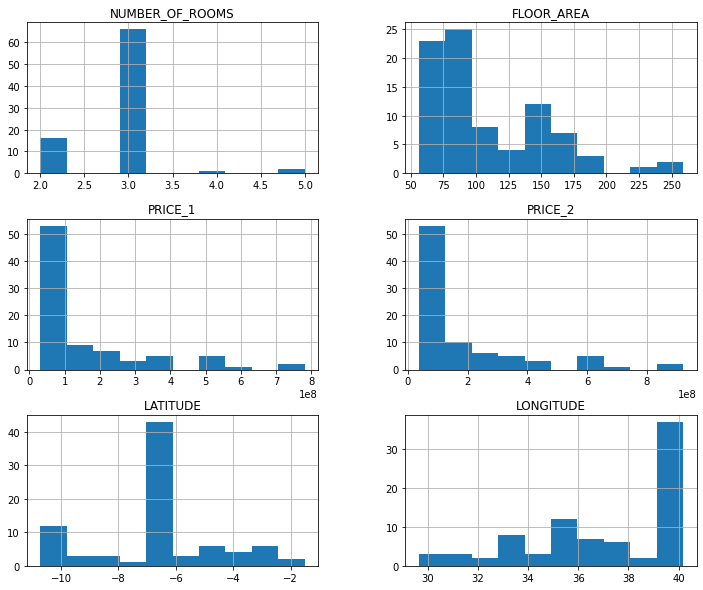

In [82]:
df.hist(figsize=(12,10))
plt.show()

In [83]:
# sns.boxplot(data=df, x='House type', y='Price')


In [84]:
#Splitting the features into training and test sets using scikit-learn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [85]:
#importing evaluation metrics of linear regression models
from sklearn import metrics

In [86]:
#Training using the linear regression Model
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [87]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [88]:
lr_pred = linear_regression.predict(X_test)

In [89]:
print(np.sqrt(metrics.mean_squared_error(y_test, lr_pred))) #RMSE
print('\n')
print(metrics.r2_score(y_test,lr_pred)) #R2

0.5865849506974046


0.7670609073215386


In [90]:
#checking other model performance
from sklearn.linear_model import Lasso, ElasticNet, LogisticRegression, Ridge

In [91]:
#Lasso regression
lasso_regres = Lasso()
lasso_regres.fit(X_train,y_train)

Lasso()

In [92]:
lasso_pred = lasso_regres.predict(X_test)

In [93]:
print(np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))
print('\n')
print(metrics.r2_score(y_test,lasso_pred))

1.2477696337688966


-0.05402125986965478


In [94]:
#ElasticNetRegression
elastic = ElasticNet()
elastic.fit(X_train,y_train)
elastic_pred = elastic.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, elastic_pred)))
print('\n')
print(metrics.r2_score(y_test,elastic_pred))

1.1027782503420946


0.17670224628841835


In [95]:
# Ridge regression
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))
print('\n')
print(metrics.r2_score(y_test,ridge_pred))

0.5852485024010685


0.7681211336869255


In [96]:
#Training using the decision trees 
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)
dt_pred = dtree.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, dt_pred)))
print('\n')
print(metrics.r2_score(y_test,dt_pred))

0.5800728083483709


0.7722042789540708


In [97]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

0.5538154967850446


0.7923601271937827


/home/kb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_2', ylabel='Density'>

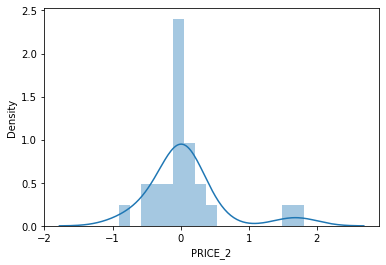

In [98]:
sns.distplot((y_test-rfr_pred))

In [99]:
#checking using the support vector regressor
from sklearn.svm import SVR
svr_regressor = SVR(kernel='rbf')
svr_regressor.fit(X_train,y_train)
svr_pred = svr_regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('\n')
print(metrics.r2_score(y_test,svr_pred))

0.9073288811890937


0.4426730855388934


In [100]:
#Inversing the standardized features
inv_df=scaler.inverse_transform(standardized_df, copy=None)
nhc = pd.DataFrame(inv_df,columns=new_df.columns)

In [101]:
nhc.head()

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,PRICE_2,LATITUDE,LONGITUDE
0,3.0,144.0,1.0,8.767921e+07,-6.8640,39.3880
1,3.0,130.0,1.0,1.373007e+08,-6.7978,39.2621
2,2.0,56.0,1.0,4.340479e+07,-10.6589,35.6460
3,3.0,85.0,1.0,5.882300e+07,-1.5000,33.8000
4,3.0,70.0,1.0,4.923899e+07,-10.6425,35.6317


In [102]:
#Assigning the features into X and Y 
X_column= nhc[['NUMBER_OF_ROOMS', 'FLOOR_AREA', 'HOUSE_TYPE', 'LATITUDE','LONGITUDE']]
y_column = nhc['PRICE_2']

In [103]:
#Splitting the features into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_column, y_column, test_size=0.3, random_state=20)

In [104]:
#for random forests
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=30, random_state=20)
regressor.fit(X_train, y_train)
rfr_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
print('\n')
print(metrics.r2_score(y_test,rfr_pred))

112042192.81967814


0.7962375189417294


In [105]:
y_test[:3]

66     79436420.0
51    381060000.0
12     52807950.0
Name: PRICE_2, dtype: float64

In [106]:
rfr_pred[:3]

array([5.11725573e+07, 4.87958326e+08, 4.53789254e+07])

In [107]:
#Saving every other model
from json5 import dump, load

In [108]:
import pickle
with open('regressor_pkl', 'wb') as f:
    pickle.dump(regressor, f)

In [109]:
# pred = loaded_regressor.predict(X_test)

In [110]:
# pred[:5]

In [111]:
X_test

,NUMBER_OF_ROOMS,FLOOR_AREA,HOUSE_TYPE,LATITUDE,LONGITUDE
66,3.0,85.00,1.0,-5.088800,39.102300
51,3.0,190.53,2.0,-6.779000,39.253400
12,2.0,65.00,1.0,-6.797800,39.262100
83,3.0,70.00,1.0,-5.900000,37.400000
36,3.0,188.00,2.0,-6.779000,39.253400
44,3.0,177.00,2.0,-6.796200,39.269300
23,3.0,184.00,2.0,-6.723100,39.229900
0,3.0,144.00,1.0,-6.864000,39.388000
77,3.0,85.00,1.0,-10.658900,35.646000
45,3.0,70.00,1.0,-9.981900,39.699600
